In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#  Análisis de ventas de Amazon

**El conjunto de datos de ventas de Amazon contiene información sobre listados de productos, desempeño de ventas, reseñas de clientes y calificaciones de una variedad de artículos vendidos en Amazon. Este conjunto de datos es útil para analizar las tendencias de ventas y el rendimiento de los clientes y productos.**

 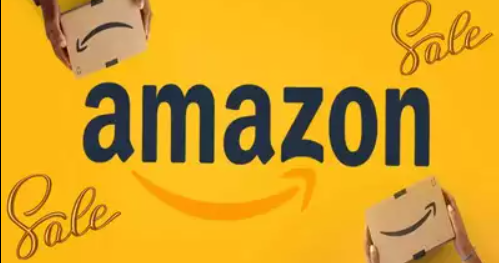

**Usos potenciales y análisis**

****
1. Identificar productos y categorías de mejor rendimiento por ventas e ingresos.

2. Analizar las opiniones y calificaciones de los clientes para medir la satisfacción del producto.

---
### <span style="color:chartreuse"> 1. Adquisición de datos </span>
---

In [2]:
df = pd.read_csv('amazon.csv')

---
### <span style="color:chartreuse"> 2. Observación de nuestros datos </span>
---

In [3]:
df.sample(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
204,B00GG59HU2,BlueRigger High Speed HDMI Cable with Ethernet...,"Electronics|HomeTheater,TV&Video|Accessories|C...",₹467,₹599,22%,4.4,"44,054",[Premium Cable] - High-Speed HDMI Cables. Made...,"AH3JUIQYDAPZIELYMMCLQIF66NDA,AGM6VKOVQWLVZW5NX...","Kakulie,Amjath sp,Saj Erassery,Rajesh Macwan,b...","RJQS7P8SU8IWQ,R1UGY1AUWR3H1S,REGWIUI7EJ0IS,RIO...","BEST WITH BOAT & LG SMART TV,This product is o...",Perfect hdmi cable for boat soundbar and lg sm...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/BlueRigger-High-Speed-Ca...
384,B08ZN4B121,WeCool Bluetooth Extendable Selfie Sticks with...,Electronics|Mobiles&Accessories|MobileAccessor...,₹539,"₹1,599",66%,3.8,"14,648",Ultra Light Selfie Stick can be used to Take s...,"AGUFJYDE6UKS5WLQYUXYVT5OTWCQ,AHOQDY4AERBRQUTZN...","Shyam,Tushar,vahida,Kapil Chaudhary,Kritish Ga...","R2U0MOPP5A6KMF,RPZFZ77ZCT4IM,R2K55RM7YMMECZ,RA...","Do not waste your money!,stable only till half...",I bought this product with the hope that it wo...,https://m.media-amazon.com/images/I/41m7DLY3yG...,https://www.amazon.in/WeCool-Bluetooth-Extenda...
76,B09YLXYP7Y,Ambrane 60W / 3A Fast Charging Output Cable wi...,Computers&Accessories|Accessories&Peripherals|...,₹179,₹399,55%,4.0,"1,423",Fast Charging Cable - The cable can support up...,"AGU76WKSU62DUNTPCMTC4FCUNRTQ,AEOVR6JEQTAC77BXE...","Actual user,Shanti lal Gurjar,Gowthami,Amrut K...","R8QBCR9MM1LGY,R3VN8XDH215N7I,R341EQRY87EZP,R3H...","GOOD,Thank you Amazon very good charging cabl...","Everything is fine but it is bulky and hard, i...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Charging-Neckban...
68,B07966M8XH,Model-P4 6 Way Swivel Tilt Wall Mount 32-55-in...,"Electronics|HomeTheater,TV&Video|Accessories|T...","₹1,599","₹2,999",47%,4.2,"2,727",Full motion cantilever mount|Fits 32inch-55inc...,"AGZU6C2XL3X2B4NEWLQJDSJ75QGA,AHY62YAUHMMGFKSBG...","Prashant Pradhan,Raghavendra Shetty,Shiva pras...","R9GNL4OF49DH6,R2I0MJPJI6FOIE,R732VQVZLKUGL,R3L...","A nice & sturdy product.,Assembly,nyc hairdrye...","Its a good product. Used for 42 inch TV, had ...",https://m.media-amazon.com/images/I/41+mgWz7kn...,https://www.amazon.in/Model-P4-Swivel-32-55-in...
683,B01M72LILF,"Logitech M221 Wireless Mouse, Silent Buttons, ...",Computers&Accessories|Accessories&Peripherals|...,₹799,"₹1,295",38%,4.4,"34,852",Enjoy the sound of silence. With the same clic...,"AEEYJCTR44VPW4DW537EAZHK5CPQ,AGHDZUKPZDC4HH2GV...","Kshitij,UMAKANTA SASMAL,Deepak Kumar Singh,Ana...","R2ZXDFN8U4X0T3,RD94LCPFDC5TC,R2S5WXQYTXTQYQ,R2...","Worth buying it.,Nice,Good product,Good,Logite...","I am using it from 1 month, it works decent.Si...",https://m.media-amazon.com/images/I/31ROHZJMEU...,https://www.amazon.in/Logitech-Silent-Wireless...
1081,B00W56GLOQ,"Wonderchef Nutri-blend Mixer, Grinder & Blende...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,699","₹5,000",46%,4,"26,164",Performance with Style: India's favourite Mixe...,"AF6LIODHEVBNHSICH65AHW3Q5K6Q,AHHZ7QIHLGGULJCNS...","Abhilash Sengupta,Shweta Sharma,Jennifer John,...","R2YKA1GGN5SFQE,RTTEA9QADDEHQ,R1BDGOIPZLHU2G,RM...","Good stuff,Perfect for small kitchen,Convenien...","Okay, I have to say the following 5 things.1. ...",https://m.media-amazon.com/images/I/41gZhEcCCQ...,https://www.amazon.in/Wonderchef-Nutri-Blend-W...
381,B09XB7SRQ5,"Redmi 10A (Slate Grey, 4GB RAM, 64GB Storage) ...",Electronics|Mobiles&Accessories|Smartphones&Ba...,"₹8,999","₹11,999",25%,4.0,"12,796",Camera: 13MP Rear Camera | 5MP Front Camera|Di...,"AFIJZPIDNQJFJUO46X7TVPBDYSCQ,AHIQL236HODJPRW5A...","Mahantesh,Gaurav Chaubey,uma vijay,Asif ikbal,...","R98JKKNCSM7B5,R38O9HQOE1G03B,R597Z0G89GU27,RAI...","Good.,Best at the price,Good phone,NICE,Value ...",Camera and display is very poor quality and ba...,https://m.

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [6]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


# Datos duplicados

In [10]:
#mmiramos si hay filas duplicadas
df.duplicated().sum()


np.int64(0)

In [11]:
df[df.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


# Datos faltantes

In [12]:
# miramos si hay datos faltantes:
df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
df.isna().sum() #Es otra forma de hacerlo. 

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [15]:
df.shape

(1465, 16)

In [21]:
# miramos el porcentaje de datos faltantes:
round(df.isnull().sum()/(df.shape[0]))*100 #me trae la cantidad de f ilas

product_id             0.0
product_name           0.0
category               0.0
discounted_price       0.0
actual_price           0.0
discount_percentage    0.0
rating                 0.0
rating_count           0.0
about_product          0.0
user_id                0.0
user_name              0.0
review_id              0.0
review_title           0.0
review_content         0.0
img_link               0.0
product_link           0.0
dtype: float64

In [22]:
# observamos que la columna 'rating_count' tinene valores faltantes y queremos verlos asi que hacemos una mascara:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


---
### <span style="color:chartreuse"> 3. Generamos alguans estadisticas Basicas: </span>
---

In [23]:
# miramos el tamaño de nuestro dataset
df.shape

(1465, 16)

In [42]:
# miramos la cantidade de datos y los tipos de datos
df.describe().T #paa que lo muestre en verfical

,count,unique,top,freq
product_id,1465,1351,B08WRWPM22,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


In [41]:
# miramos la cantidade de datos y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

---
### <span style="color:chartreuse"> 4. Ajustamos nuestros Datos segun su naturaleza: </span>
---

**Convertimos `discounted_price` en tipo  integer o entero**

**Convertimos `actual_price` en tipo  integer o entero**

**convertimos  `discount_percentage` de tipo object a tipo float o decimal**

**convertimos  `rating` de tipo object a tipo float o decimal**

**convertimos `rating_count` de tipo object a tipo float o decimal**

**Removemos `discounted_price`	y `actual_price`**

In [26]:
#miramos como quedo nustro df


---
### <span style="color:chartreuse"> 5. Comenzamos a analizar nuestros datos: </span>
---

# Manipulación de datos

**Número total de categorías Principales**

In [27]:
# vamos a limpiar un poco para saber cuantas categorias de productos tenemos # se separan por |


# creamos un pequeño dataset  category_1, contamos los valores, los ordenamos y creamos dos columnas 'category_name' y 'count_of_category'


**Un pequeño plot para uan inspeccion visual de las categorías Principales**

### Un Producto puede tener mas de una categroia, ahora vamos a analizar la segunda categoria: ####


**Número total de categorías secundarias**

In [28]:
# vamos a limpiar un poco para saber cuantas categorias de productos tenemos
# se separan por |


# creamos un pequeño dataset  category_2, contamos los valores, los ordenamos y creamos dos columnas 'category_name' y 'count_of_category'


**Un pequeño plot para uan inspeccion visual de las categorías secundarias**

In [29]:
# solo vamos a ver los 5 primeros


**Productos boAt**

vamos a analizar un poco de una Marca en puntual boAt y ver su precio de venta promedio 

In [30]:
#Seleccionar productos cuyo nombre contiene la palabra "boat" (ignorando mayúsculas y valores nulos) y luego selecciona solo dos columnas: "product_name" y "actual_price_rupees"
 #case=False ignora mayuscular na=False vita errores si hay valores NaN


In [31]:
# Calcula el precio promedio de los productos filtrados


**Productos Noise**

In [32]:
#Seleccionar productos cuyo nombre contiene la palabra "Noise" (ignorando mayúsculas y valores nulos) y luego selecciona solo dos columnas: "product_name" y "actual_price_rupees"
#acalaraciones adicionales:
# Busca productos cuyo nombre contiene exactamente la palabra "Noise".
# \b: Marca límites de palabra. Esto asegura que solo coincida con "Noise" como palabra completa y no con parte de otra palabra (por ejemplo, no incluirá "Noisemaker").
#case=False ignora mayuscular na=False vita errores si hay valores NaN


**Valor medio de `actual_price_rupees` por cada categoría:**

Ahora queremos saber el valor promedio de enta por categoria

In [33]:
#pd.DataFrame() Convierte el resultado del agrupamiento (que es un objeto Series) en un DataFrame
#sort_values() lo ordena de mayor a menor




**Top 5 de la categoría de calificación más alta :**

Queremos saber cuales son las categorias mejor calificadas para ello debemos mirar el rating

**Top 5 de la categoría de calificación más baja :**

Queremos saber cuales son las categorias peor calificadas para ello debemos mirar el rating

**Porcentaje de descuento promedio basado en cada categoría :**

In [34]:
# ordenamos las categorias con mayor descuento promedio

**Precio de descuento promedio basado en cada categoría**

**Extracción de datos basados ​​en review_title :**

**`review_title` - Good [Indiqca la calidad general del producto]**

**La calificación indica cuánta calificación le ha dado el cliente al producto**

**La calificación mayoritaria se encuentra entre 3,5 y 4,5, lo que indica que la calidad general del producto es buena**

vamos a mirar en review_title si aparece la palabra Good para definir si es un buen producto

In [35]:
#filtramos y miramos si las reviw tienen la palabra good, tambien podriamos hacer un analisis de sentimientos con Natural Laguanje Process NLP


---
### <span style="color:chartreuse"> 6.  Visualizaciones de nuestros datos: </span>
---

**rating vs actual_price_rupees**

Creamos un diagrama de dispersión (scatterplot) utilizando Seaborn para visualizar la relación entre las calificaciones (rating) y los precios reales (actual_price_rupees) de los productos.


**Como puede ver, la mayor parte de la tarifa del producto se encuentra entre 3,5 y 4,5**

El valor medio deberia andar por esos numeros , vamos a comprobarlo: 


In [36]:
# kde=True Añade una curva de densidad que suaviza la distribución para facilitar su análisis.


In [37]:
# pequeño Boxplot para visualizar los datos de otra manera


**Productos con la calificación más alta**

In [38]:
#filtramos aquellos productos con calificacion mayor a 4.8


**visualizar la distribución de los precios descontados (discounted_price_rupees) en el DataFrame:**

**visualizar la distribución de los precios actuales (actual_price_rupees) en el DataFrame:**

**Hacemos un pequeño world cloud para ver lo mas destacada de review_content**

In [39]:
# Concatenar todos los textos de review_content en un solo string


# Generar la nube de palabras


# Mostrar la nube de palabras


Las reseñas de los usuarios se centran principalmente en aspectos relacionados con la calidad del producto, el precio, y si vale la pena (worth) la inversión. 
Los comentarios destacan tanto opiniones positivas como 'good', 'best' y 'excellent', así como críticas negativas como 'cheap' y 'unreliable', reflejando una mezcla de satisfacción y preocupaciones sobre los productos evaluados."

**Hacemos un pequeño world cloud para ver lo mas destacada de product_name**

In [40]:


# Generar la nube de palabras

# Mostrar la nube de palabras para product_name


Resumen basado en la nube de palabras de los nombres de productos:

La nube de palabras generada a partir de los nombres de productos muestra que los términos más comunes están relacionados con características técnicas, colores y funcionalidades. Las palabras destacadas incluyen:

Colores predominantes:

"Black", "White", y "Grey" son los colores más frecuentes, lo que indica que son los más comunes o populares en los productos listados.
Características técnicas:

Palabras como "Type", "C", "USB", "Fast Charging", y "Adapter" sugieren que muchos productos están relacionados con accesorios tecnológicos, como cables y cargadores.
Otras palabras como "Watt", "Compatible", y "Charging" indican especificaciones técnicas clave.
Categorías de productos:

Se destacan términos como "Laptop", "Smartphone", "LED", y "Stainless Steel", que apuntan a una variedad de productos electrónicos, electrodomésticos, y utensilios.
En general, esta distribución sugiere que los productos están enfocados en tecnología, accesorios electrónicos, y electrodomésticos funcionales, con énfasis en la compatibilidad, el diseño moderno, y la utilidad práctica